## Data Creation

In [0]:
%sql
drop table if exists cb_HR;
create table cb_HR as



select distinct a.user_id,coalesce(gmv,0 ) as gmv,coalesce(a.bonus_cash_used) as bonus_cash_used,
coalesce(winnings, 0) as winnings,coalesce(act,0) as act,roller
from
(select distinct user_id,sum(gmv) as gmv,sum(bonus_cash_used) as bonus_cash_used,sum(winnings) as winnings, count(distinct dt) as act
from da.all_category_metrics
where lower(country_code)='in'
and dt>=date_sub(current_date,14)
and game_type='cb'
and gmv>0
and cash_entry_fee in (1000,2500)
group by 1) as a
left join
(select distinct user_id,pref_cat,roller
from universal_roller_tag
where dt=current_date
and pref_cat='cb'
and roller='HR') as b on a.user_id=b.user_id

where b.user_id is not null

num_affected_rows,num_inserted_rows


In [0]:
%sql
select count(*),count(distinct user_id) from cb_HR

count(1),count(DISTINCT user_id)
1724,1724


In [0]:
%sql
drop table if exists lad_users;
create table lad_users as



select distinct user_id,max(dt) as lad
from da.all_category_metrics
where lower(country_code)='in'
and gmv>0
group by 1

num_affected_rows,num_inserted_rows


In [0]:
%sql
drop table if exists cb_HR_6jun;
create table cb_HR_6jun as 

select a.*,b.lad

from

(select * from cb_HR) as a
left join
(select * from lad_users) as b on a.user_id=b.user_id

num_affected_rows,num_inserted_rows


In [0]:
%sql
select * from cb_HR_6jun

user_id,gmv,bonus_cash_used,winnings,act,roller,lad
126307876,43000.0,55.0,38500.0,7,HR,2023-06-05
13519508,294500.0,1217.58,285666.67,10,HR,2023-06-03
19644128,6000.0,0.0,0.0,1,HR,2023-06-05
214071410,26000.0,989.5,11500.0,2,HR,2023-06-01
21533410,69500.0,316.28,51400.0,6,HR,2023-06-05
215849364,27000.0,150.0,24500.0,6,HR,2023-06-05
21684667,10000.0,100.0,16000.0,4,HR,2023-06-05
218301563,2000.0,35.0,0.0,1,HR,2023-06-04
228078125,582000.0,865.0,482466.67,14,HR,2023-06-05
2283473,3500.0,60.0,3500.0,1,HR,2023-06-05


In [0]:
%sql
drop table if exists  cb_HR_6jun_gmv ;
create table cb_HR_6jun_gmv  as



select distinct a.user_id,a.gmv,a.bonus_cash_used,a.winnings,a.act,
sum(b.gmv) as 14_gmv,sum(b.bonus_cash_used) as 14_bonus_cash_used,sum(b.winnings) as 14_winnings,count(distinct dt) as 14_ad
from

(select * from cb_HR_6jun) as a
left join
(select distinct dt,user_id,sum(gmv) as gmv,sum(bonus_cash_used) as bonus_cash_used,sum(winnings) as winnings
from da.all_category_metrics 
where lower(country_code)='in'
and game_type='cb'
and gmv>0
group by 1,2
) as b on a.user_id =b.user_id and datediff(a.lad,b.dt)<14
group by 1,2,3,4,5

num_affected_rows,num_inserted_rows


In [0]:
%sql
select count(*),count(distinct user_id) from  cb_HR_6jun_gmv 

count(1),count(DISTINCT user_id)
1724,1724


In [0]:
%sql
drop table if exists   cb_HR_6jun_deposit;
create table  cb_HR_6jun_deposit  as


select distinct a.user_id,a.gmv,a.bonus_cash_used,a.winnings,a.act,
sum(deposit) as deposit,coalesce(sum(b.transactions),0) as transactions
from

(select * from cb_HR_6jun) as a
left join
(select distinct dt,user_id, sum(amount) as deposit,count(distinct transaction_id) as transactions
       from global_base.user_payment_transaction_update
       where lower(status) = 'success'
       and lower(account_type) = 'deposit' 
       and injected_country_code='IN'
       group by 1,2
) as b on a.user_id =b.user_id and datediff(a.lad,b.dt)<14
group by 1,2,3,4,5

num_affected_rows,num_inserted_rows


In [0]:
%sql
select count(*),count(distinct user_id) from  cb_HR_6jun_deposit

count(1),count(DISTINCT user_id)
1724,1724


In [0]:
%sql

drop table if exists cb_HR_final;
create table cb_HR_final as

select *,
 case when datediff(date_sub(current_date(),1),to_date(lad))<=7 then 0
                            when datediff(date_sub(current_date(),1),to_date(lad))<=14 then 1
                            when datediff(date_sub(current_date(),1),to_date(lad))<=21 then 2
                            when datediff(date_sub(current_date(),1),to_date(lad))<=28 then 3
                            when datediff(date_sub(current_date(),1),to_date(lad))<=35 then 4 end as inactivity
                            from

(
select distinct a.user_id,lad,coalesce(14_gmv) as gmv,coalesce(14_bonus_cash_used,0) as bonus_cash_used,
coalesce(14_winnings,0) as winnings,coalesce(14_ad,0) as  ad,coalesce(deposit,0) as deposit,coalesce(transactions, 0) as transactions,
round(coalesce(coalesce(14_bonus_cash_used,0)/coalesce(14_gmv,0),0)*100,0) as bonus_util,
coalesce(14_winnings/(14_gmv-14_bonus_cash_used),0) as rtp,
coalesce(coalesce(deposit,0)/coalesce(transactions,0),0) as adv,
coalesce(coalesce(14_gmv,0)/coalesce(14_ad,0),0) as gmvpad
from 
(select * from cb_HR_6jun) as a
left join
(select * from cb_HR_6jun_gmv) as b on a.user_id=b.user_id
left join
(select * from cb_HR_6jun_deposit) as c on a.user_id=c.user_id
)

num_affected_rows,num_inserted_rows


In [0]:
%sql
select count(*),count(distinct user_id) from cb_HR_final

count(1),count(DISTINCT user_id)
1724,1724


## Clustering

In [0]:
final_data=spark.sql('''select distinct user_id,ad,transactions,bonus_util,rtp,adv,gmvpad ,inactivity
                        from cb_HR_final''').toPandas()

In [0]:
final_data

Out[182]:

,user_id,ad,transactions,bonus_util,rtp,adv,gmvpad,inactivity
0,211486495,10,73,0.0,0.466929,178.904110,2268.500000,0
1,63693388,14,118,0.0,0.984162,274.788136,5852.500000,0
2,38863240,10,8,0.0,0.931239,255.250000,1690.000000,0
3,210409855,12,58,0.0,0.712291,341.982759,2632.500000,0
4,246880347,10,63,0.0,0.616828,136.206349,1240.000000,0
...,...,...,...,...,...,...,...,...
1719,4123948,10,9,5.0,0.815186,3797.666667,5065.000000,0
1720,243537551,7,41,0.0,0.705977,605.780488,5148.571429,0
1721,88538341,11,47,1.0,0.697137,915.000000,9355.454545,0
1722,35592278,12,84,0.0,0.948065,775.964286,17116.666667,0


In [0]:
data=final_data

In [0]:
data # copy of main dataframe

Out[184]:

,user_id,ad,transactions,bonus_util,rtp,adv,gmvpad,inactivity
0,211486495,10,73,0.0,0.466929,178.904110,2268.500000,0
1,63693388,14,118,0.0,0.984162,274.788136,5852.500000,0
2,38863240,10,8,0.0,0.931239,255.250000,1690.000000,0
3,210409855,12,58,0.0,0.712291,341.982759,2632.500000,0
4,246880347,10,63,0.0,0.616828,136.206349,1240.000000,0
...,...,...,...,...,...,...,...,...
1719,4123948,10,9,5.0,0.815186,3797.666667,5065.000000,0
1720,243537551,7,41,0.0,0.705977,605.780488,5148.571429,0
1721,88538341,11,47,1.0,0.697137,915.000000,9355.454545,0
1722,35592278,12,84,0.0,0.948065,775.964286,17116.666667,0


In [0]:
data=data.drop('user_id',axis=1)

In [0]:
data

Out[186]:

,ad,transactions,bonus_util,rtp,adv,gmvpad,inactivity
0,10,73,0.0,0.466929,178.904110,2268.500000,0
1,14,118,0.0,0.984162,274.788136,5852.500000,0
2,10,8,0.0,0.931239,255.250000,1690.000000,0
3,12,58,0.0,0.712291,341.982759,2632.500000,0
4,10,63,0.0,0.616828,136.206349,1240.000000,0
...,...,...,...,...,...,...,...
1719,10,9,5.0,0.815186,3797.666667,5065.000000,0
1720,7,41,0.0,0.705977,605.780488,5148.571429,0
1721,11,47,1.0,0.697137,915.000000,9355.454545,0
1722,12,84,0.0,0.948065,775.964286,17116.666667,0


1724
2
3
4
5
6
7
8
9
10

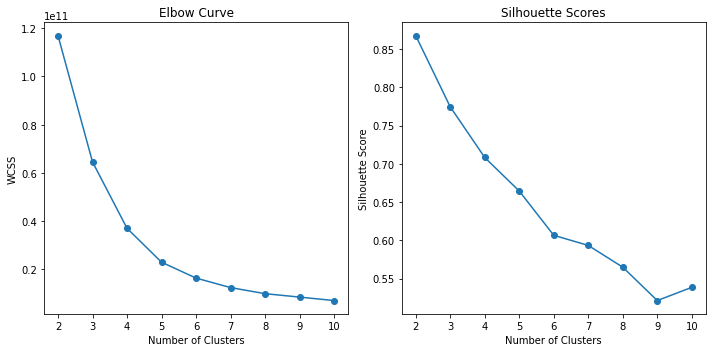

In [0]:

#data_df
print(len(data))



import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Define the range of cluster numbers to explore
min_clusters = 2
max_clusters = 10

# Perform K-means clustering for different numbers of clusters
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    print(n_clusters)

# Plotting the elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(min_clusters, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()


In [0]:
X=data

In [0]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.867480061943081
For n_clusters = 3 The average silhouette_score is : 0.7714904960569702
For n_clusters = 4 The average silhouette_score is : 0.7082128210029603
For n_clusters = 5 The average silhouette_score is : 0.664329290323185
For n_clusters = 6 The average silhouette_score is : 0.6064872042176539
For n_clusters = 7 The average silhouette_score is : 0.5923458942078486
For n_clusters = 8 The average silhouette_score is : 0.5721600036573055
For n_clusters = 9 The average silhouette_score is : 0.5509021201958226
For n_clusters = 10 The average silhouette_score is : 0.5554830971306933

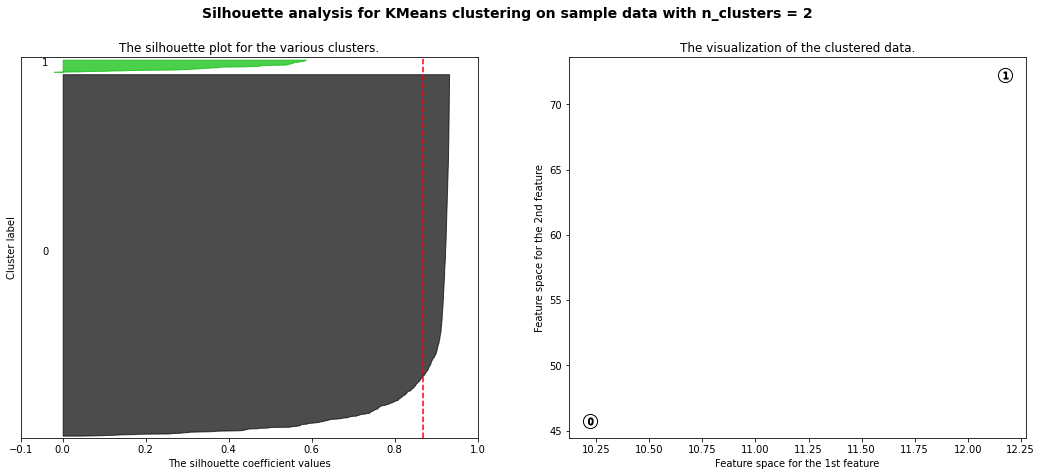

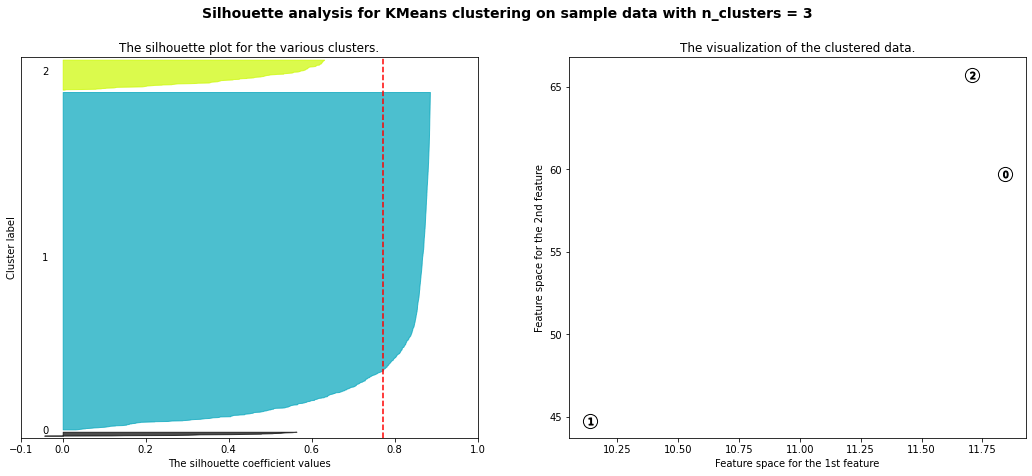

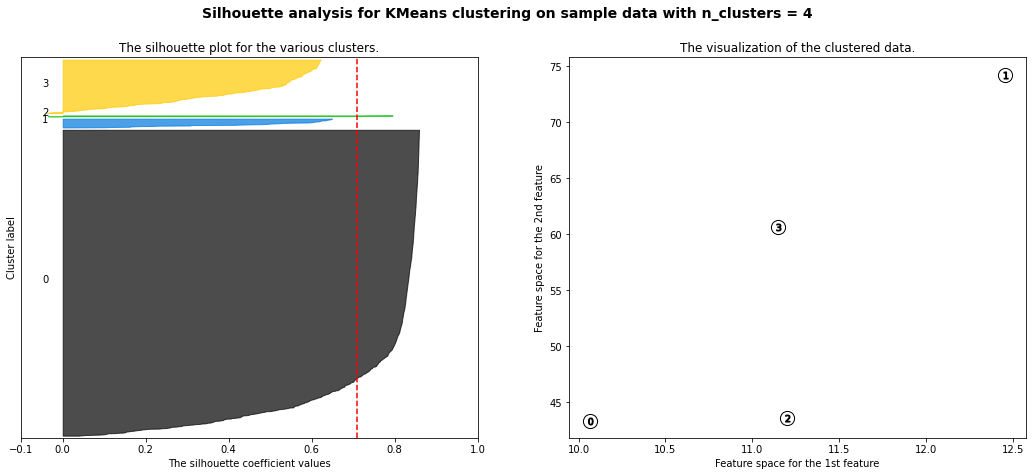

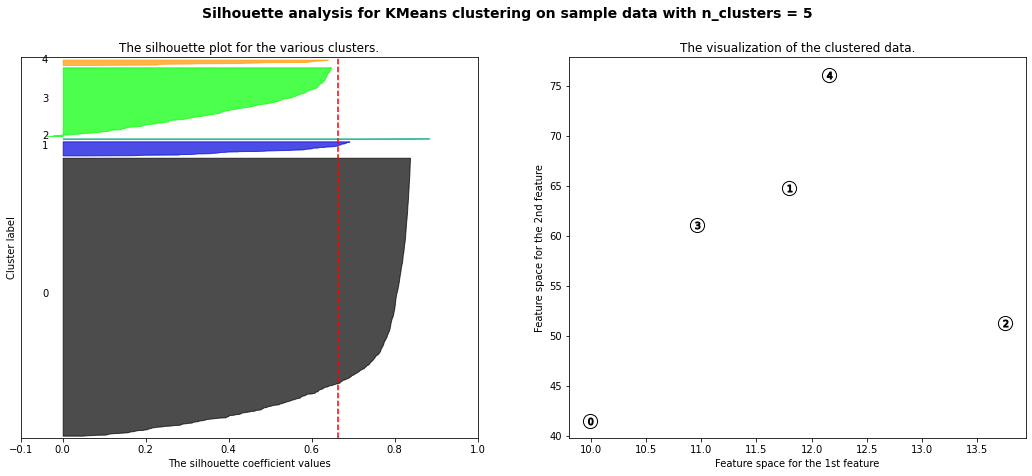

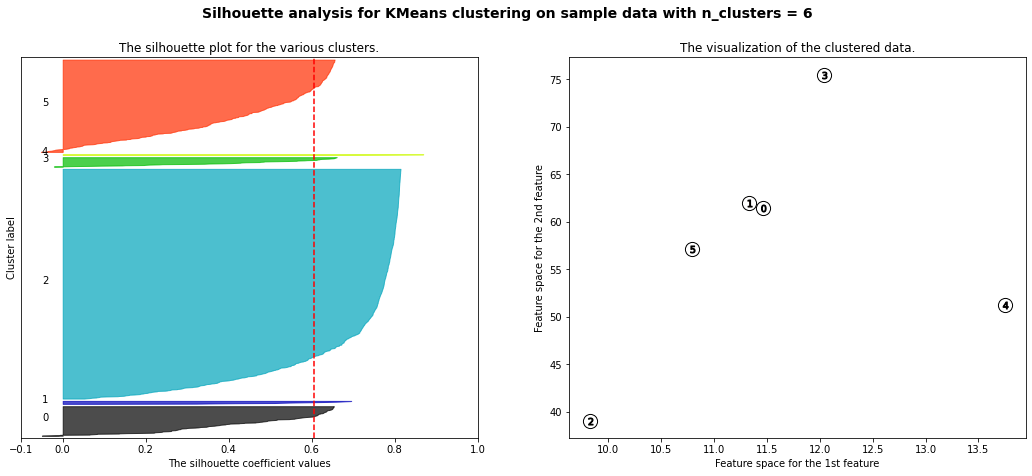

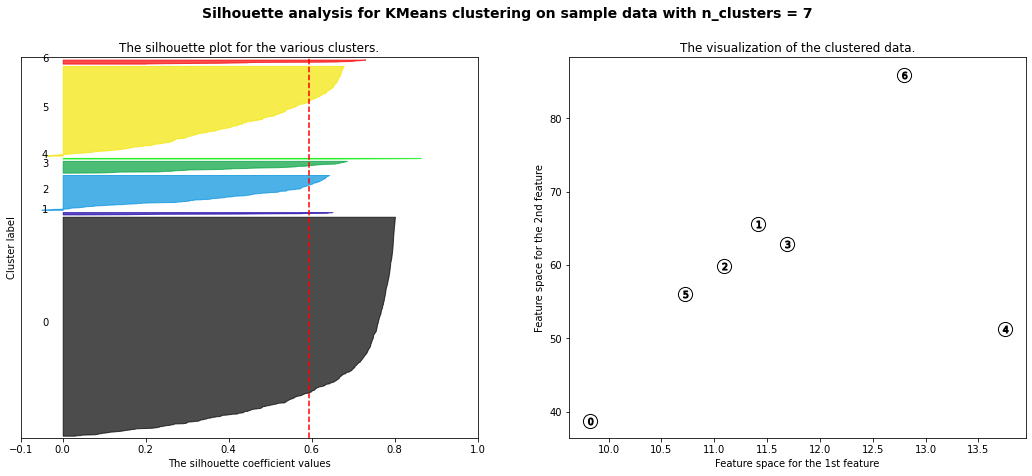

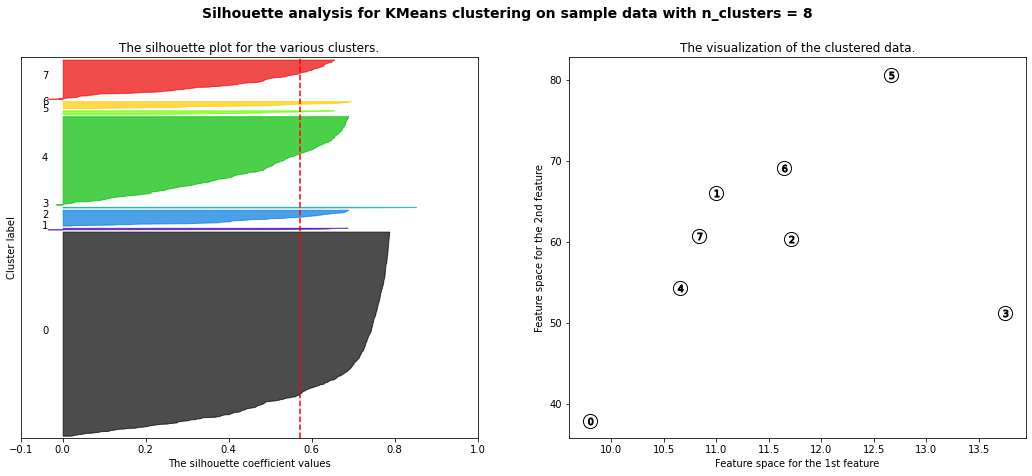

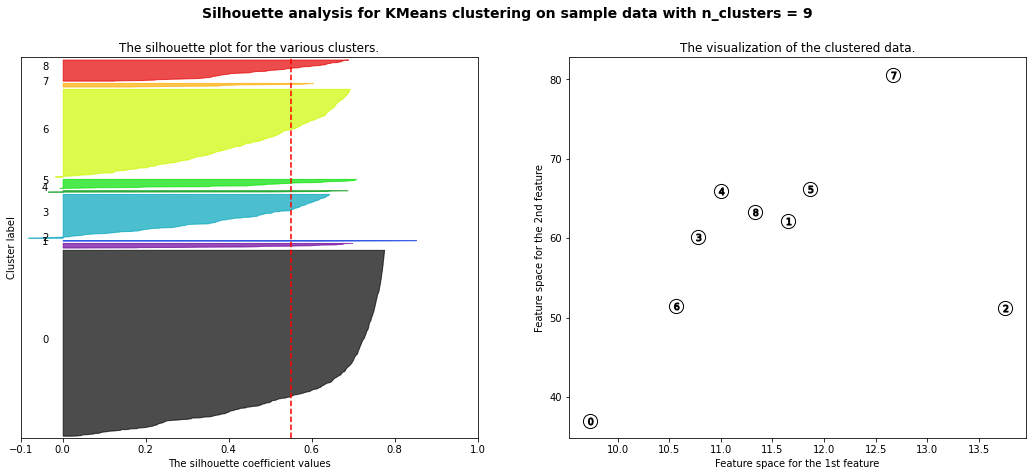

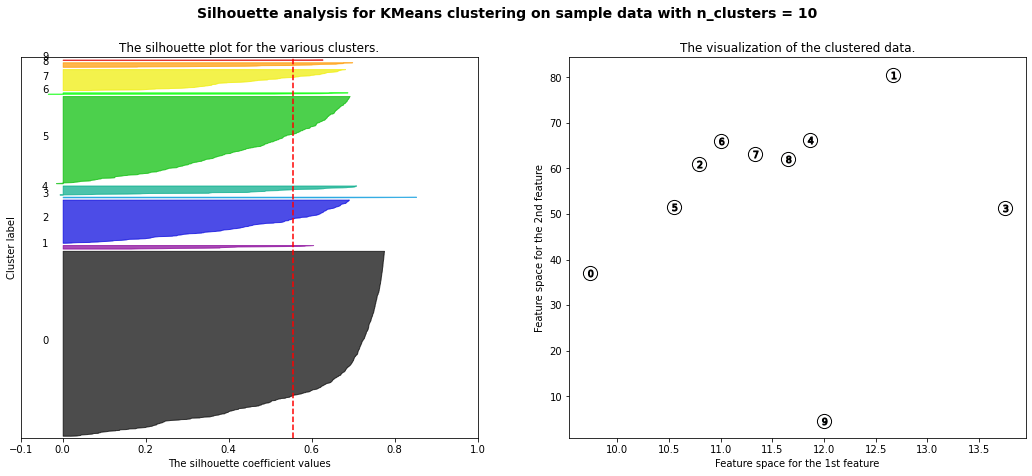

In [0]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
      ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples
    
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')
    # ax2.scatter(X[:, 0], X[:, 1], marker = "o", alpha = 0.9,s=250,c='red',label='Centroids')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = "o", alpha = 0.9,s=250,c='red',label='Centroids')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    

In [0]:
data

Out[110]:

,ad,transactions,bonus_util,rtp,adv,gmvpad,inactivity
0,10,73,0.0,0.466929,178.904110,2268.500000,0
1,14,118,0.0,0.984162,274.788136,5852.500000,0
2,10,8,0.0,0.931239,255.250000,1690.000000,0
3,12,58,0.0,0.712291,341.982759,2632.500000,0
4,10,63,0.0,0.616828,136.206349,1240.000000,0
...,...,...,...,...,...,...,...
1719,10,9,5.0,0.815186,3797.666667,5065.000000,0
1720,7,41,0.0,0.705977,605.780488,5148.571429,0
1721,11,47,1.0,0.697137,915.000000,9355.454545,0
1722,12,84,0.0,0.948065,775.964286,17116.666667,0


In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
final_data[['ad', 'inactivity', 'gmvpad', 'bonus_util','transactions', 'adv', 'rtp']] = scaler.fit_transform(final_data[['ad', 'inactivity', 'gmvpad', 'bonus_util','transactions', 'adv', 'rtp']])

# Use K-means clustering to cluster the data based on the feature values
kmeans = KMeans(n_clusters=2, random_state=42).fit(final_data[['ad', 'inactivity', 'gmvpad', 'bonus_util','transactions', 'adv', 'rtp']])
clusters = kmeans.labels_

# Split the data into two sets based on the cluster labels
final_data['Cluster'] = clusters

# Print the number of users in each cluster
print(final_data['Cluster'].value_counts())

1 1117
0 607
Name: Cluster, dtype: int64

In [0]:
final_data

Out[165]:

,user_id,ad,transactions,bonus_util,rtp,adv,gmvpad,inactivity,Cluster
0,211486495,0.692308,0.201657,0.000000,0.191188,0.005771,0.011859,0.0,1
1,63693388,1.000000,0.325967,0.000000,0.402974,0.008864,0.032905,0.0,1
2,38863240,0.692308,0.022099,0.000000,0.381305,0.008234,0.008462,0.0,1
3,210409855,0.846154,0.160221,0.000000,0.291654,0.011032,0.013996,0.0,1
4,246880347,0.692308,0.174033,0.000000,0.252566,0.004394,0.005819,0.0,1
...,...,...,...,...,...,...,...,...,...
1719,4123948,0.692308,0.024862,0.833333,0.333786,0.122505,0.028281,0.0,1
1720,243537551,0.461538,0.113260,0.000000,0.289069,0.019541,0.028771,0.0,0
1721,88538341,0.769231,0.129834,0.166667,0.285449,0.029516,0.053475,0.0,1
1722,35592278,0.846154,0.232044,0.000000,0.388194,0.025031,0.099050,0.0,1


## Feature Selection

### Random Classifier

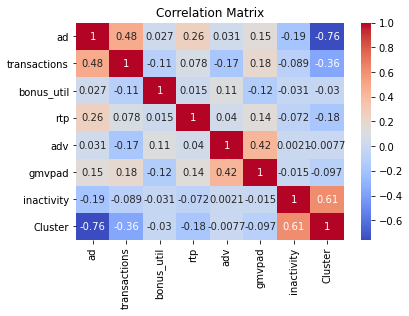

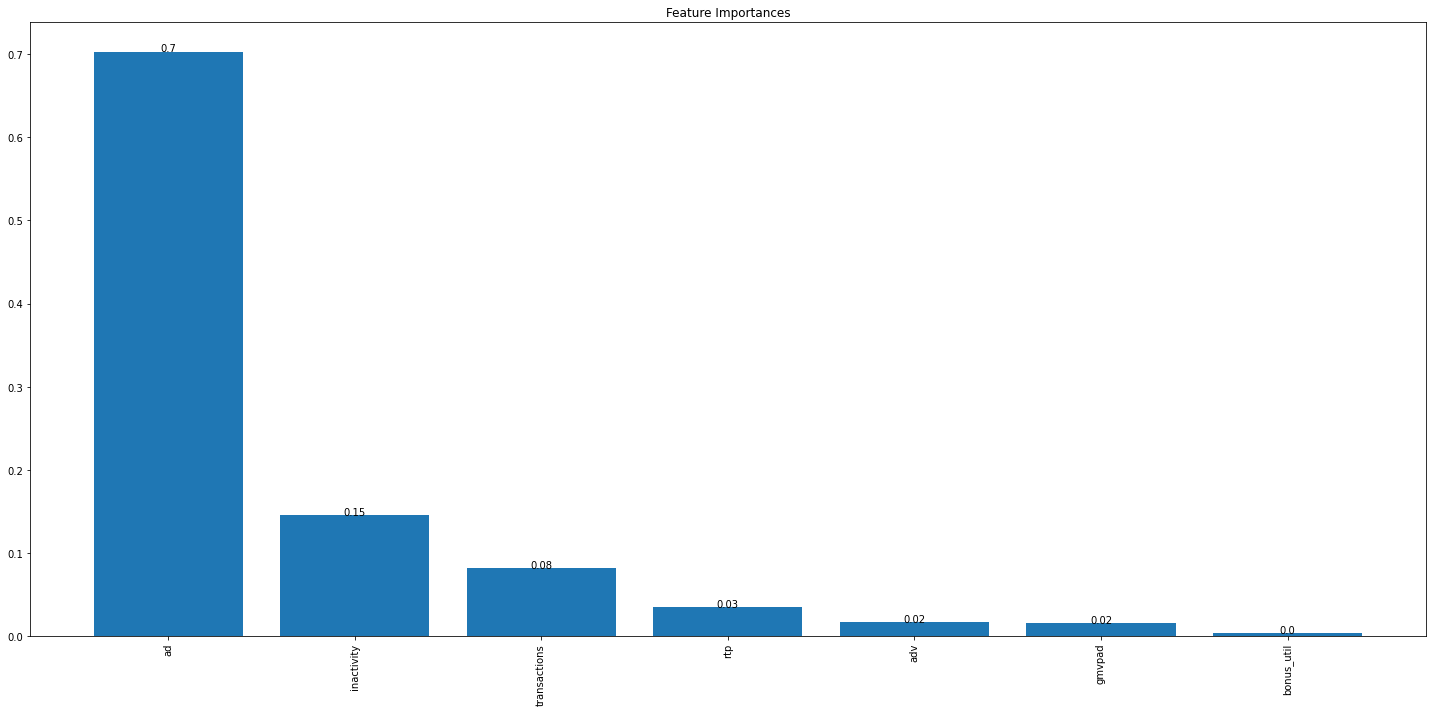

In [0]:
%python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Compute the correlation matrix of the dataset
corr_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Train a random forest classifier on the dataset
X= data.drop('Cluster',axis=1)
y = data['Cluster']
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Compute the feature importance of the parameters
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances as a bar chart
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)

for i in range(X.shape[1]):
    plt.text(i, importances[indices][i], round(importances[indices][i], 2), ha='center')

plt.tight_layout()

plt.show()


### ExtraTreesClassifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

Out[114]: ExtraTreesClassifier()

In [0]:
print(model.feature_importances_)

[0.71080386 0.06186573 0.0072238 0.03356634 0.01732622 0.01732141
 0.15189264]

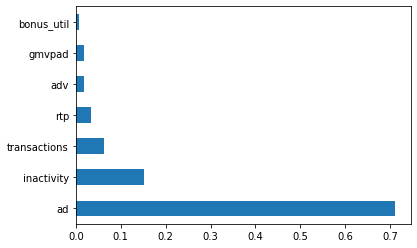

In [0]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## A/B Split

In [0]:
final_data

Out[167]:

,user_id,ad,transactions,bonus_util,rtp,adv,gmvpad,inactivity,Cluster
0,211486495,0.692308,0.201657,0.000000,0.191188,0.005771,0.011859,0.0,1
1,63693388,1.000000,0.325967,0.000000,0.402974,0.008864,0.032905,0.0,1
2,38863240,0.692308,0.022099,0.000000,0.381305,0.008234,0.008462,0.0,1
3,210409855,0.846154,0.160221,0.000000,0.291654,0.011032,0.013996,0.0,1
4,246880347,0.692308,0.174033,0.000000,0.252566,0.004394,0.005819,0.0,1
...,...,...,...,...,...,...,...,...,...
1719,4123948,0.692308,0.024862,0.833333,0.333786,0.122505,0.028281,0.0,1
1720,243537551,0.461538,0.113260,0.000000,0.289069,0.019541,0.028771,0.0,0
1721,88538341,0.769231,0.129834,0.166667,0.285449,0.029516,0.053475,0.0,1
1722,35592278,0.846154,0.232044,0.000000,0.388194,0.025031,0.099050,0.0,1


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_data[['user_id', 'ad', 'inactivity', 'gmvpad',	'bonus_util', 'transactions', 'adv', 'rtp', 'Cluster']], final_data['Cluster'], stratify=final_data['Cluster'], test_size=0.3, random_state=42)
# Print the number of data points in each cohort
print(f"Number of data points in training set: {len(X_train)}")
print(f"Number of data points in testing set: {len(X_test)}")


print(X_train['Cluster'].value_counts())
print(X_test['Cluster'].value_counts())

Number of data points in training set: 1206
Number of data points in testing set: 518
1 781
0 425
Name: Cluster, dtype: int64
1 336
0 182
Name: Cluster, dtype: int64

In [0]:

%python
import numpy as np
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType

df1=X_train
schema = StructType([ 
                     StructField('user_id', StringType(), True),
                     StructField('ad', FloatType(), True),
                     StructField('inactive', FloatType(), True),
                    StructField('gmvpad', FloatType(), True),
                     StructField('bonus_util', FloatType(), True),
                     StructField('transactions', FloatType(), True),
                     StructField('adv', FloatType(), True),
                     StructField('rtp', FloatType(), True),
                     StructField('Cluster', IntegerType(), True)
                    ])


spark_df3 = spark.createDataFrame(df1, schema = schema)
spark_df3.write.mode("overwrite").saveAsTable("default.cb_bonus_experiment_ab_train2")



df2=X_test

spark_df3 = spark.createDataFrame(df2, schema = schema)
spark_df3.write.mode("overwrite").saveAsTable("default.cb_bonus_experiment_ab_test2")

In [0]:
%sql
drop table if exists da.cb_ab_bonus_experiment2;
create table da.cb_ab_bonus_experiment2

select *, 'control' as flag
  from default.cb_bonus_experiment_ab_test2
union all
select *, 'test' as flag
  from default.cb_bonus_experiment_ab_train2

num_affected_rows,num_inserted_rows


In [0]:
%sql
select * from da.cb_ab_bonus_experiment

user_id,ad,inactive,gmvpad,bonus_util,transactions,adv,rtp,Cluster,flag
42504938,0.7692308,0.0,0.022003658,0.33333334,0.038674034,0.02937788,0.38503647,0,test
245968995,0.30769232,0.0,0.007886361,0.16666667,0.046961326,0.013282732,0.102931246,1,test
213939497,0.23076923,0.0,0.013673412,0.0,0.08287293,0.008952688,0.17039196,1,test
18151499,1.0,0.0,0.032848235,0.33333334,0.14088398,0.024449715,0.2859746,0,test
125636006,0.7692308,0.0,0.06275831,0.0,0.26519337,0.01858871,0.38531467,0,test
243530831,0.7692308,0.0,0.051051285,0.0,0.11878453,0.0080442615,0.42370585,0,test
16249725,1.0,0.0,0.15876493,0.5,0.12154696,0.13442229,0.44620934,0,test
240374454,0.84615386,0.0,0.0039514997,0.16666667,0.09116022,0.006641251,0.15524139,0,test
223676257,0.84615386,0.0,0.023612106,0.16666667,0.110497236,0.008835484,0.4009118,0,test
40077798,1.0,0.0,0.013285427,0.8333333,0.0138121545,0.118064515,0.4164444,0,test


In [0]:
%sql
select a.flag,count(distinct a.user_id),sum(gmv)/count(distinct a.user_id),sum(14_gmv)/count(distinct a.user_id)
from
(select * from da.cb_ab_bonus_experiment2) as a
left join
(select * from cb_HR_6jun_gmv) as b on a.user_id=b.user_id
group by 1

flag,count(DISTINCT user_id),(sum(gmv) / count(DISTINCT user_id)),(sum(14_gmv) / count(DISTINCT user_id))
control,518,55170.84942084942,92182.33976833976
test,1206,47786.069651741294,83947.75207296849
